# Section 1. Data sets Download and Preparation

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import re
import html
import warnings
warnings.filterwarnings("ignore")

## 1.1 Re-write SIC data set

1. Standard Industrial Classification (SIC) appears in the data sets as a code to identify different industry. To figure out the meaning of each code, we find the explanation on SEC website (https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list). In order to read in the content as a dataframe later on, we copy the text from the website and save as a .txt file. In this part, we define a function to re-write the SIC.txt file as a .csv file.

In [3]:
# this function is to rewrite the SIC.txt file as a SIC.csv file.
def rewrite_SIC(rewritePath, filePath = "SIC.txt"):
    with open(filePath, 'r', encoding='utf-8') as document:
        SIC_content = document.read()
    SIC_str = str(SIC_content)
    with open(rewritePath, 'w', newline='') as csv_file:
        csv_file.write(SIC_str)
    print("SIC file is re-writed as .csv file successfully.")

In [4]:
rewritePath = "SIC.csv"
rewrite_SIC(rewritePath)

SIC file is re-writed as .csv file successfully.


2. Here, read in the SIC.csv file as a dataframe.

In [5]:
SIC_df = pd.read_csv(rewritePath, sep = "\t")
SIC_df.head()

,SIC Code,Office,Industry Title
0,100,Industrial Applications and Services,AGRICULTURAL PRODUCTION-CROPS
1,200,Industrial Applications and Services,AGRICULTURAL PROD-LIVESTOCK & ANIMAL SPECIALTIES
2,700,Industrial Applications and Services,AGRICULTURAL SERVICES
3,800,Industrial Applications and Services,FORESTRY
4,900,Industrial Applications and Services,"FISHING, HUNTING AND TRAPPING"


## 1.2 Read in the financial statement data sets

1. The financial statement data sets are provided by SEC (https://www.sec.gov/dera/data/financial-statement-data-sets). We download the data from 2022Q1 up to now that is 2023Q3 in a folder. For each data set of a specified quarter, there are 4 .txt files which are number, presentation, submission, and tag. Here, we define a function to read in all 4 files of one specified quarter as 4 dataframes respectively and stored them in a list.

In [6]:
# this function is to read in the financial statement data sets.
def read_files(folderPath):
    entireFiles_dict = {} # dictionary to store all dataframes of one quarter
    fileName_lst = os.listdir(folderPath)
    for fileName in fileName_lst:
        filePath = folderPath + fileName
        entireFiles_dict[fileName] = pd.read_csv(filePath, delimiter = "\t")
    return entireFiles_dict

2. Read in 2022Q2-Q4 and 2023Q1 files as the dataframes and store in a dictionary.

In [7]:
_2022FolderPath = "Financial Statement Data Sets/2022/"
_2022File_dict = {}

# get the first sub-folder names which are quarters in 2023
subFolderName_lst = os.listdir(_2022FolderPath)
for subFolderName in subFolderName_lst:
    subFolderPath = _2022FolderPath + subFolderName + "/"
    
    # read the files in this path and store in the dictionary
    _2022File_dict[subFolderName] = read_files(subFolderPath)

_2022File_dict["2022q1"]["sub.txt"].head() # present one of these dataframes

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000016099-22-000014,16099,LUBYS INC,5812.0,US,TX,HOUSTON,77040,13111 NORTHWEST FREEWAY,SUITE 600,...,20220331.0,NaN,NaN,20220331,2022-03-31 16:22:00.0,0,0,lub-20220327_htm.xml,1,NaN
1,0000018255-22-000017,18255,CATO CORP,5621.0,US,NC,CHARLOTTE,28273-5975,8100 DENMARK ROAD,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 13:27:00.0,0,0,cato8k1Q2022-CC_htm.xml,1,NaN
2,0000049196-22-000037,49196,HUNTINGTON BANCSHARES INC /MD/,6021.0,US,OH,COLUMBUS,43287,HUNTINGTON CTR,41 S HIGH ST HC0917,...,20220331.0,NaN,NaN,20220331,2022-03-31 08:34:00.0,0,0,hban-20220330_htm.xml,1,NaN
3,0000082811-22-000074,82811,REGAL REXNORD CORP,3621.0,US,WI,BELOIT,53511,200 STATE ST,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 17:17:00.0,0,0,rbc-20220328_htm.xml,1,NaN
4,0000092230-22-000040,92230,TRUIST FINANCIAL CORP,6021.0,US,NC,CHARLOTTE,28202,214 NORTH TRYON STREET,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 17:13:00.0,0,0,tfc-20220329_htm.xml,1,NaN


In [8]:
_2023FolderPath = "Financial Statement Data Sets/2023/"
_2023File_dict = {}

# get the first sub-folder names which are quarters in 2023
subFolderName_lst = os.listdir(_2023FolderPath)
for subFolderName in subFolderName_lst:
    subFolderPath = _2023FolderPath + subFolderName + "/"
    
    # read the files in this path and store in the dictionary
    _2023File_dict[subFolderName] = read_files(subFolderPath)

_2023File_dict["2023q1"]["sub.txt"].head() # present one of these dataframes

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000004457-23-000026,4457,U-HAUL HOLDING CO /NV/,7510.0,US,NV,RENO,89511,5555 KIETZKE LANE STE 100,NaN,...,20230331.0,NaN,NaN,20230329,2023-03-29 16:05:00.0,0,0,uhal-20230323_htm.xml,1,NaN
1,0000005272-23-000014,5272,"AMERICAN INTERNATIONAL GROUP, INC.",6331.0,US,NY,NEW YORK,10020-1304,1271 AVE OF THE AMERICAS,FL 37,...,NaN,NaN,NaN,20230329,2023-03-29 16:44:00.0,0,0,aig-20230329_htm.xml,1,NaN
2,0000062709-23-000021,62709,"MARSH & MCLENNAN COMPANIES, INC.",6411.0,US,NY,NEW YORK,10036,1166 AVENUE OF THE AMERICAS,NaN,...,20230331.0,NaN,NaN,20230329,2023-03-29 16:04:00.0,0,0,mmc-20230329_htm.xml,1,NaN
3,0000063908-23-000017,63908,MCDONALDS CORP,5812.0,US,IL,CHICAGO,60607,110 NORTH CARPENTER STREET,NaN,...,20230331.0,NaN,NaN,20230329,2023-03-29 16:34:00.0,0,0,mcd-20230327_htm.xml,1,NaN
4,0000065984-23-000027,65984,ENTERGY CORP /DE/,4911.0,US,LA,NEW ORLEANS,70113,639 LOYOLA AVE,NaN,...,20230331.0,NaN,NaN,20230329,2023-03-29 12:12:00.0,0,0,etr-20230329_htm.xml,2,1348952


## 1.3 Filter and combine the submissions.

In this part, we process the fincancial reports with the fiscal year ended in different years seperately. According to the SEC requirements (https://www.securexfilings.com/sec-deadlines/#:~:text=09%2F30%2F23-,10%2DK%3A%20Due%20Wednesday%2C%20November%2029%2C%202023%20for,Period%20Ended%2011%2F30%2F23), the submision of the 10-K form is due on 60-90 days after the end of the fiscal year based on its filer status. Therefore, we need to filter the submissions with fiscal year ended in a desired year from submissions of the first quarter of the next yeaar, and the submissions with fiscal year ended in the previouse year from submissions of the first quarter of the desired yeaar.

### Submissions with fiscal year ended in 2022

In [9]:
# filter from 2023Q1
_2023Q1File_df = _2023File_dict["2023q1"]["sub.txt"]
_22FYFile_df = _2023Q1File_df[_2023Q1File_df["fye"] > 1001]

# filter from 2022Q1
_2022Q1File_df = _2022File_dict["2022q1"]["sub.txt"]
_2022Q1File_df = _2022Q1File_df[_2022Q1File_df["fye"] < 401]

2. Now, combine the records filtered previously with the records in 2023Q3 submissions.

In [10]:
_2022Q2File_df = _2022File_dict["2022q2"]["sub.txt"]
_2022Q3File_df = _2022File_dict["2022q3"]["sub.txt"]

_22FYFile_df = pd.concat([_2022Q1File_df, _2022Q2File_df, _2022Q3File_df, _22FYFile_df], axis=0)
_22FYFile_df.head()

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
1,0000018255-22-000017,18255,CATO CORP,5621.0,US,NC,CHARLOTTE,28273-5975,8100 DENMARK ROAD,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 13:27:00.0,0,0,cato8k1Q2022-CC_htm.xml,1,NaN
110,0001070235-22-000044,1070235,BLACKBERRY LTD,7372.0,CA,ON,WATERLOO,N2K 0A7,2200 UNIVERSITY AVENUE EAST,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 17:12:00.0,0,0,bbry-20220331_htm.xml,1,NaN
163,0001104659-22-041044,27419,TARGET CORP,5331.0,US,MN,MINNEAPOLIS,55403,1000 NICOLLET MALL,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 16:16:00.0,0,0,tm2210651d1_8k_htm.xml,1,NaN
317,0001193125-22-091944,716314,GRAHAM CORP,3560.0,US,NY,BATAVIA,14020,20 FLORENCE AVE,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 16:46:00.0,0,0,d317076d8k_htm.xml,1,NaN
500,0001326380-22-000038,1326380,GAMESTOP CORP.,5734.0,US,TX,GRAPEVINE,76051,625 WESTPORT PARKWAY,NaN,...,20220331.0,NaN,NaN,20220331,2022-03-31 16:16:00.0,0,0,gme-20220331_htm.xml,1,NaN


### 1.3.1 Submissions of 10-K filings.
In this project, we only focus on the 10-K fillings.

In [11]:
_22FY10KFile_df = _22FYFile_df[_22FYFile_df["form"] == "10-K"]
_22FY10KFile_df = pd.merge(_22FY10KFile_df, SIC_df, left_on = "sic", right_on = "SIC Code")
_22FY10KFile_df.head()

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,filed,accepted,prevrpt,detail,instance,nciks,aciks,SIC Code,Office,Industry Title
0,0001412408-22-000019,1412408,"PHREESIA, INC.",7389.0,US,NC,RALEIGH,27601,434 FAYETTEVILLE ST.,SUITE 1400,...,20220331,2022-03-31 16:03:00.0,0,1,phr-20220131_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC"
1,0001428336-22-000009,1428336,"HEALTHEQUITY, INC.",7389.0,US,UT,DRAPER,84020,15 WEST SCENIC POINTE DRIVE,SUITE 100,...,20220331,2022-03-31 16:04:00.0,0,1,hqy-20220131_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC"
2,0001199835-22-000283,1079282,"RIVULET MEDIA, INC.",7389.0,US,AZ,GILBERT,85296,"1206 EAST WARNER ROAD, SUITE 101-I",NaN,...,20220513,2022-05-12 20:06:00.0,0,1,rivu-10k_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC"
3,0001558891-22-000031,1726079,"TIPMEFAST, INC.",7389.0,IL,NaN,ZIHRON YA'AKOV,30950,HASHUMURA ST 1,NaN,...,20220513,2022-05-13 11:56:00.0,0,1,tpmf-20211231_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC"
4,0001493152-22-009370,1022899,"PROTAGENIC THERAPEUTICS, INC.NEW",7389.0,US,NY,NEW YORK,10010,149 FIFTH AVENUE,SUITE 500,...,20220407,2022-04-07 17:09:00.0,0,1,form10-k_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC"


In [12]:
def generate_filing_url(sub_df):
    base_url = "https://www.sec.gov/Archives/edgar/data/"
    cik = str(sub_df["cik"])
    adsh = str(sub_df["adsh"])
    adshNum = adsh.replace("-", "")
    filingUrl = base_url + cik + "/" + adshNum + "/" + adsh + ".txt"
    return filingUrl

### 1.3.2 Generate filing url

In [13]:
_22FY10KFile_df["filing_url"] = _22FY10KFile_df.apply(generate_filing_url, axis=1)
_22FY10KFile_df.head()

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,accepted,prevrpt,detail,instance,nciks,aciks,SIC Code,Office,Industry Title,filing_url
0,0001412408-22-000019,1412408,"PHREESIA, INC.",7389.0,US,NC,RALEIGH,27601,434 FAYETTEVILLE ST.,SUITE 1400,...,2022-03-31 16:03:00.0,0,1,phr-20220131_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC",https://www.sec.gov/Archives/edgar/data/141240...
1,0001428336-22-000009,1428336,"HEALTHEQUITY, INC.",7389.0,US,UT,DRAPER,84020,15 WEST SCENIC POINTE DRIVE,SUITE 100,...,2022-03-31 16:04:00.0,0,1,hqy-20220131_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC",https://www.sec.gov/Archives/edgar/data/142833...
2,0001199835-22-000283,1079282,"RIVULET MEDIA, INC.",7389.0,US,AZ,GILBERT,85296,"1206 EAST WARNER ROAD, SUITE 101-I",NaN,...,2022-05-12 20:06:00.0,0,1,rivu-10k_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC",https://www.sec.gov/Archives/edgar/data/107928...
3,0001558891-22-000031,1726079,"TIPMEFAST, INC.",7389.0,IL,NaN,ZIHRON YA'AKOV,30950,HASHUMURA ST 1,NaN,...,2022-05-13 11:56:00.0,0,1,tpmf-20211231_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC",https://www.sec.gov/Archives/edgar/data/172607...
4,0001493152-22-009370,1022899,"PROTAGENIC THERAPEUTICS, INC.NEW",7389.0,US,NY,NEW YORK,10010,149 FIFTH AVENUE,SUITE 500,...,2022-04-07 17:09:00.0,0,1,form10-k_htm.xml,1,NaN,7389,Office of Trade & Services,"SERVICES-BUSINESS SERVICES, NEC",https://www.sec.gov/Archives/edgar/data/102289...


In [14]:
_22FY10KFile_df.to_csv('22FY10KFile.csv', index=False)

<Axes: title={'center': 'The First 10 Largest Industries'}, xlabel='SIC Code'>

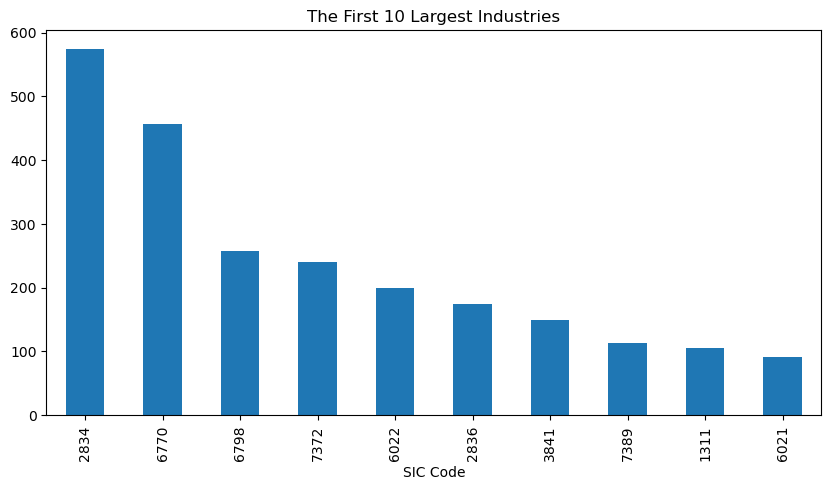

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
_22FY10KFile_df["SIC Code"].value_counts().head(10).plot(kind="bar", title="The First 10 Largest Industries")

---

In [3]:
_22FY10KFile_df = pd.read_csv("22FY10KFile.csv")

## 2.1 Download the .txt file for desired industries

### 2.1.1 Energy Industry
1. We filter the companies in energy & transportation industry and visualize them.

In [19]:
energy_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"].isin([1311, 1389, 4911])]

<Axes: title={'center': 'Number of Companies in Energy Industries'}, xlabel='SIC Code'>

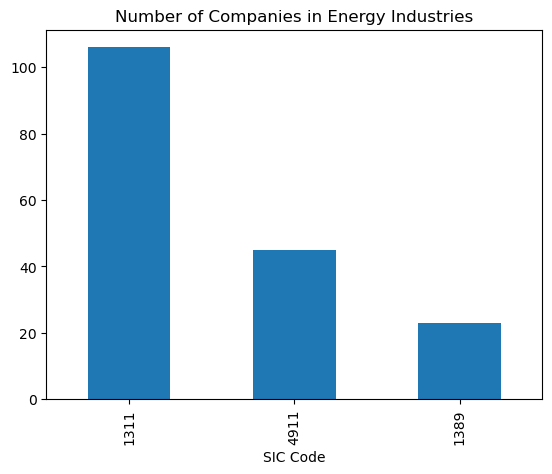

In [21]:
energy_df["SIC Code"].value_counts().plot(kind="bar", title="Number of Companies in Energy Industries")

2. We have a url of a .txt file written in html format of each submission in previous part. Now, we are going to download these files by requering the url with the following function.

In [4]:
# this function is to download the .txt file from the corresponding url.
def download_file(url, downloadPath, headerEmail):
    # request the url
    headers = {"User-Agent": headerEmail}
    response = requests.get(url, headers = headers)
    
    if response.status_code == 200:
        fileContent = response.text
        with open(downloadPath, 'w', encoding='utf-8') as file:
            file.write(fileContent)
        print("Download successifully.")
    else:
        print("Fail to download.")

3. We download these energy industry seperately.

In [39]:
_22FY10K1311_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 1311]
_22FY10K1389_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 1389]
_22FY10K4911_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 4911]

In [42]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K1311_df)):
    url = _22FY10K1311_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Energy Industry/Industry_1311/"
    fileName = str(_22FY10K1311_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

In [43]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K1389_df)):
    url = _22FY10K1389_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Energy Industry/Industry_1389/"
    fileName = str(_22FY10K1389_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.


In [44]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K4911_df)):
    url = _22FY10K4911_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Energy Industry/Industry_4911/"
    fileName = str(_22FY10K4911_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

---

### 2.1.2 Bank Industry

1. We filter the companies in bank industry and visualize them.

<Axes: title={'center': 'Number of Companies in Bank Industries'}, xlabel='SIC Code'>

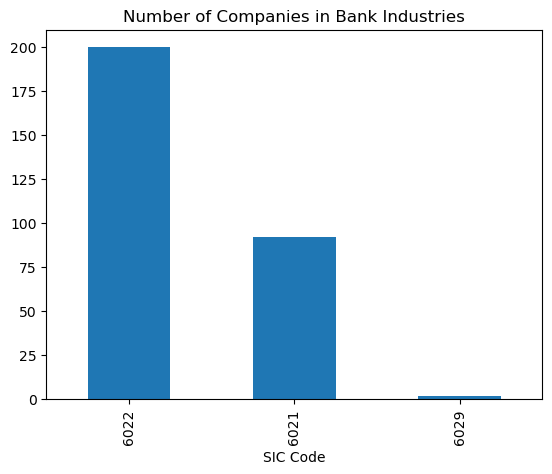

In [23]:
bank_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"].isin([6021, 6022, 6029])]
bank_df["SIC Code"].value_counts().plot(kind="bar", title="Number of Companies in Bank Industries")

2. We download these bank industry seperately.

In [22]:
_22FY10K6021_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 6021]
_22FY10K6022_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 6022]

In [46]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K6021_df)):
    url = _22FY10K6021_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Bank Industry/Industry_6021/"
    fileName = str(_22FY10K6021_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

In [48]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K6022_df)):
    url = _22FY10K6022_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Bank Industry/Industry_6022/"
    fileName = str(_22FY10K6022_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

---

### 2.1.3 Technology Service

1. We filter the companies in bank industry and visualize them.

<Axes: title={'center': 'Number of Companies in Technology Service Industries'}, xlabel='SIC Code'>

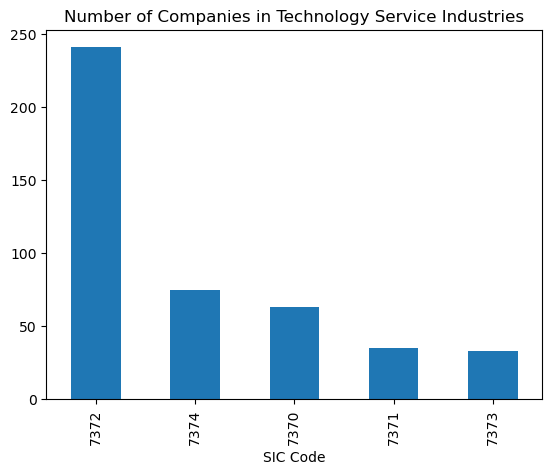

In [24]:
techService_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"].isin([7370, 7371, 7372, 7373, 7374])]
techService_df["SIC Code"].value_counts().plot(kind="bar", title="Number of Companies in Technology Service Industries")

2. We download these bank industry seperately.

In [11]:
_22FY10K7370_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 7370]
_22FY10K7372_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 7372]
_22FY10K7374_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 7374]

In [15]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K7370_df)):
    url = _22FY10K7370_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Technology Service Industry/Industry_7370/"
    fileName = str(_22FY10K7370_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

In [16]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K7372_df)):
    url = _22FY10K7372_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Technology Service Industry/Industry_7372/"
    fileName = str(_22FY10K7372_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

OSError: [Errno 28] No space left on device

In [18]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K7374_df)):
    url = _22FY10K7374_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Technology Service Industry/Industry_7374/"
    fileName = str(_22FY10K7374_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

---

### 2.1.4 Life Sciences Industry

1. We filter the companies in bank industry and visualize them.

<Axes: title={'center': 'Number of Companies in Life Sciences Industries'}, xlabel='SIC Code'>

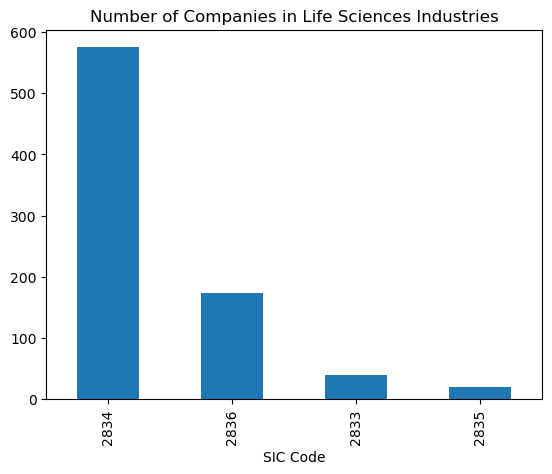

In [25]:
lifeSci_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"].isin([2833, 2834, 2835, 2836])]
lifeSci_df["SIC Code"].value_counts().plot(kind="bar", title="Number of Companies in Life Sciences Industries")

2. We download these bank industry seperately.

In [22]:
_22FY10K2834_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 2834]
_22FY10K2836_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 2836]

In [24]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,200):
    url = _22FY10K2834_df["filing_url"].iloc[i]
    folderPath = "Project/Downloaded Financial Reports/Life Sciences Industry/Industry_2834/"
    fileName = str(_22FY10K2834_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

In [25]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,100):
    url = _22FY10K2836_df["filing_url"].iloc[i]
    folderPath = "E:/Jupyter Notebook Files/ISE 540_Text Analytics/Project/Downloaded Financial Reports/Life Sciences Industry/Industry_2836/"
    fileName = str(_22FY10K2836_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

---

### 2.1.5 Real Estate Industry

1. We filter the companies in bank industry and visualize them.

<Axes: title={'center': 'Number of Companies in Real Estate Industries'}, xlabel='SIC Code'>

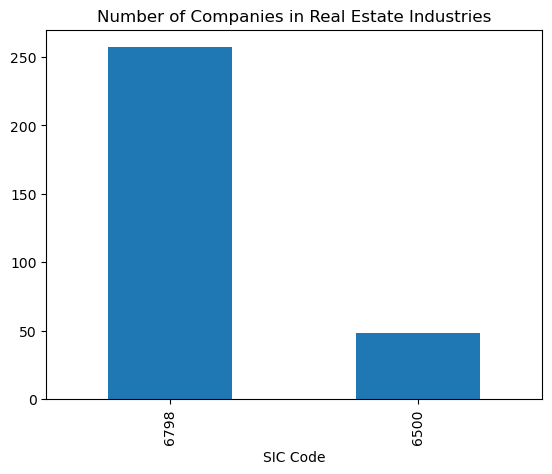

In [26]:
RealEst_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"].isin([6500, 6798])]
RealEst_df["SIC Code"].value_counts().plot(kind="bar", title="Number of Companies in Real Estate Industries")

In [52]:
_22FY10K6798_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 6798]
_22FY10K6500_df = _22FY10KFile_df[_22FY10KFile_df["SIC Code"] == 6500]

In [53]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K6500_df)):
    url = _22FY10K6500_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Real Estate Industry/Industry_6500/"
    fileName = str(_22FY10K6500_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success

In [54]:
headerEmail = "yuchaoba@usc.edu"
for i in range(0,len(_22FY10K6798_df)):
    url = _22FY10K6798_df["filing_url"].iloc[i]
    folderPath = "Downloaded Financial Reports/Real Estate Industry/Industry_6798/"
    fileName = str(_22FY10K6798_df["adsh"].iloc[i]) + ".txt"
    downloadPath = folderPath + fileName
    download_file(url, downloadPath, headerEmail)

Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download successifully.
Download success